In [1]:
import pandas as pd

file_path = "arxiv-metadata-oai-snapshot.json"

# Define chunk size based
chunk_size = 10000

# Initialize an empty DataFrame to store the concatenated chunks
df = pd.DataFrame()

# Iterate through chunks and concatenate
for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    df = pd.concat([df, chunk], ignore_index=True)

In [2]:
# Display the first few rows of the dataset
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [3]:
# Check the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)
num_papers = len(df)
print("Number of papers:", num_papers)

Dimensions of the dataset: (2431235, 14)
Number of papers: 2431235


In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 id                      0
submitter           15189
authors                 0
title                   0
comments           593263
journal-ref       1595543
doi               1263520
report-no         2251919
categories              0
license            452810
abstract                0
versions                0
update_date             0
authors_parsed          0
dtype: int64


In [5]:
# Check data types of columns
print("Data types of columns:\n", df.dtypes)

Data types of columns:
 id                object
submitter         object
authors           object
title             object
comments          object
journal-ref       object
doi               object
report-no         object
categories        object
license           object
abstract          object
versions          object
update_date       object
authors_parsed    object
dtype: object


In [6]:
# Check the unique categories
print("Unique categories:", df['categories'].nunique())

Unique categories: 81799


In [7]:
# The distribution of categories
category_counts = df['categories'].value_counts()
print("Distribution of categories:\n", category_counts)

Distribution of categories:
 categories
astro-ph                                          86911
hep-ph                                            80647
quant-ph                                          67618
hep-th                                            58395
cs.CV                                             54268
                                                  ...  
math.QA math-ph math.FA math.MP math.NT               1
physics.soc-ph cs.AI cs.NI                            1
math.ST astro-ph.CO astro-ph.IM hep-ph stat.TH        1
math.DS math.PR physics.data-an                       1
supr-con cond-mat.supr-con quant-ph                   1
Name: count, Length: 81799, dtype: int64


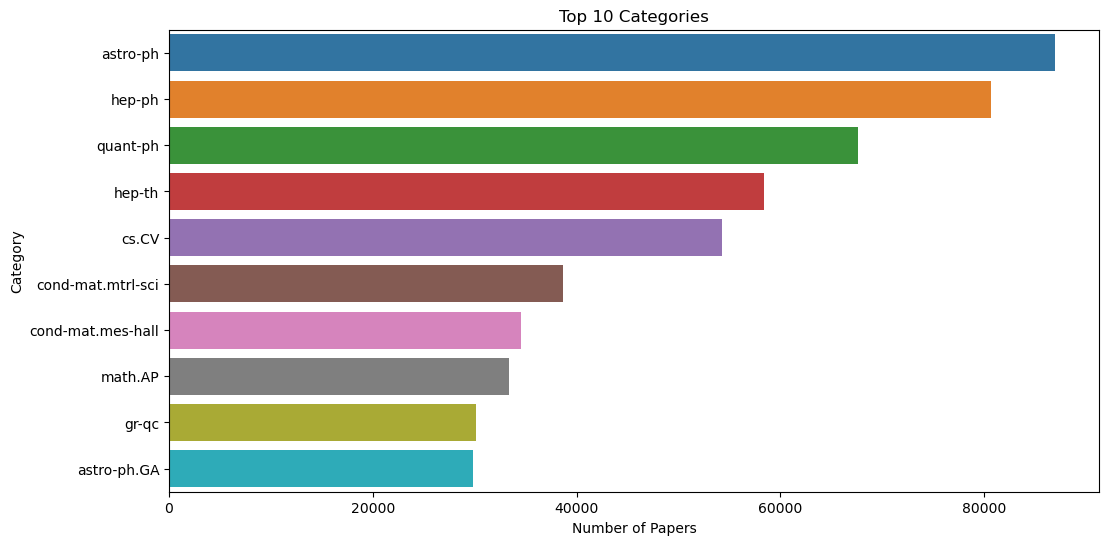

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(y='categories', data=df, order=df['categories'].value_counts().iloc[:10].index)
plt.title('Top 10 Categories')
plt.xlabel('Number of Papers')
plt.ylabel('Category')
plt.show()

In [9]:
# Pick the relevant categories
df_cleaned = df[['title','categories','abstract']]

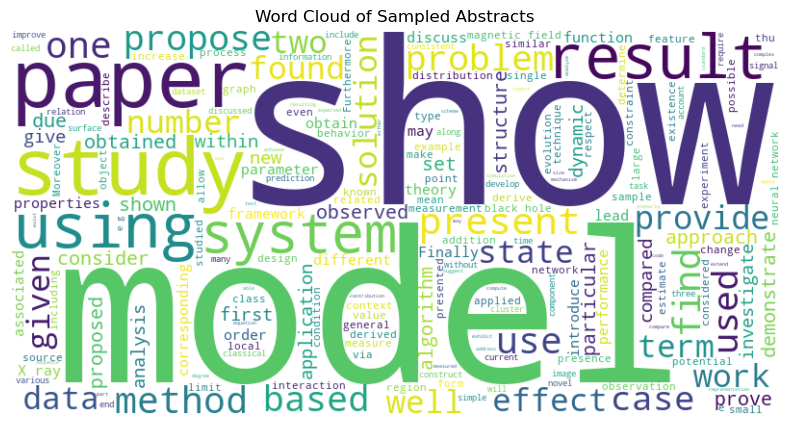

In [10]:
from wordcloud import WordCloud

# Load a subset of the dataset (e.g., 10%)
data_sample = df_cleaned.sample(frac=0.1, random_state=42)

# Concatenate abstracts from the sampled data
abstract_text = ' '.join(data_sample['abstract'].dropna())

# Generate word cloud from the sampled abstracts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(abstract_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Sampled Abstracts')
plt.axis('off')
plt.show()

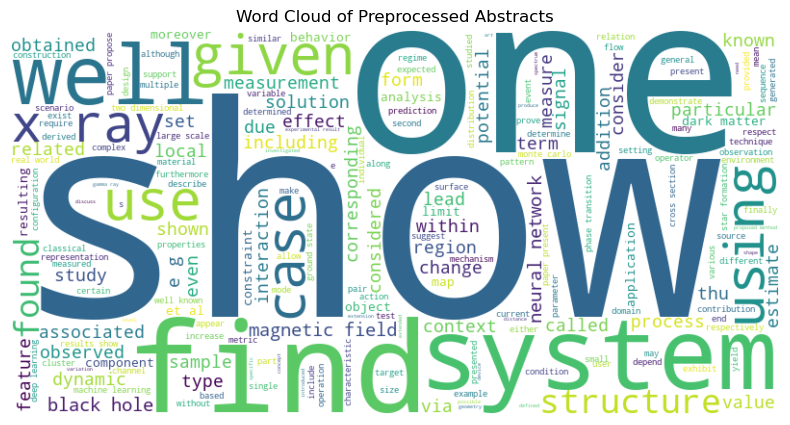

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud

data_sample = df_cleaned.sample(frac=0.1, random_state=90)

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function for text preprocessing
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Preprocess abstracts
data_sample['preprocessed_abstract'] = data_sample['abstract'].dropna().apply(preprocess_text)

# Concatenate preprocessed abstracts
preprocessed_abstract_text = ' '.join(data_sample['preprocessed_abstract'])

# Generate word cloud from preprocessed abstracts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_abstract_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Preprocessed Abstracts')
plt.axis('off')
plt.show()

In [12]:
# Save the data to a csv file
df_cleaned.to_csv('df_cleaned.csv')